In [22]:
import os
os.getcwd()

'D:\\Anaconda1\\Jupyter Work\\Data Science'

In [23]:
import pandas as pd
df = pd.read_csv('final_dropandsuccess_merge.csv')
df.head()


,Unnamed: 0.1,Unnamed: 0,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,0,Single,17,5,171,Daytime,1,122.0,Portuguese,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,Single,15,1,9254,Daytime,1,160.0,Portuguese,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,2,Single,1,5,9070,Daytime,1,122.0,Portuguese,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,3,Single,17,2,9773,Daytime,1,122.0,Portuguese,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,4,Married,39,1,8014,Evening,1,100.0,Portuguese,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# check duplicate

In [24]:
df.duplicated().sum()
#df.drop_duplicated(inplace = True)

0

# Delete Unnamed column

In [25]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,Unnamed: 0.1,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,Single,17,5,171,Daytime,1,122.0,Portuguese,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,Single,15,1,9254,Daytime,1,160.0,Portuguese,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,Single,1,5,9070,Daytime,1,122.0,Portuguese,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,Single,17,2,9773,Daytime,1,122.0,Portuguese,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,Married,39,1,8014,Evening,1,100.0,Portuguese,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [26]:
df.shape

(4424, 38)

In [27]:
df.info()  #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0.1                                    4424 non-null   int64  
 1   Marital Status                                  4424 non-null   object 
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Daytime/evening attendance                      4424 non-null   object 
 6   Previous qualification                          4424 non-null   int64  
 7   Previous qualification (grade)                  4420 non-null   float64
 8   Nacionality                                     4424 non-null   object 
 9   Mother's qualification                   

In [28]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])   #so next, we focus on these 4 columns to do imputation

Previous qualification (grade)     4
Unemployment rate                 17
Inflation rate                    11
GDP                               13
dtype: int64


In [29]:
df.describe()

,Unnamed: 0.1,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4420.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4407.000000,4413.000000,4411.000000
mean,2211.500000,18.669078,1.727848,8856.642631,4.577758,132.499838,19.561935,22.275316,10.960895,11.032324,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.576483,1.229976,0.003857
std,1277.243125,17.484682,1.313793,2063.566416,10.216592,13.668676,15.603186,15.343108,26.418253,25.263040,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.684172,1.390664,2.278692
min,0.000000,1.000000,0.000000,33.000000,1.000000,11.637391,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-6.770953
25%,1105.750000,1.000000,1.000000,9085.000000,1.000000,125.000000,2.000000,3.000000,4.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,2211.500000,17.000000,1.000000,9238.000000,1.000000,133.100000,19.000000,19.000000,5.000000,7.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,3317.250000,39.000000,2.000000,9556.000000,1.000000,140.000000,37.000000,37.000000,9.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,4423.000000,57.000000,9.000000,9991.000000,43.000000,190.000000,44.000000,44.000000,194.000000,195.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,25.997450,9.275820,10.051779


In [30]:
df.rename(columns={"Nacionality": "Nationality"}, inplace=True)
df.head()

,Unnamed: 0.1,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,Single,17,5,171,Daytime,1,122.0,Portuguese,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,Single,15,1,9254,Daytime,1,160.0,Portuguese,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,Single,1,5,9070,Daytime,1,122.0,Portuguese,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,Single,17,2,9773,Daytime,1,122.0,Portuguese,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,Married,39,1,8014,Evening,1,100.0,Portuguese,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [31]:
df["Marital Status"].unique() #show unique values

array(['Single', 'Married', 'Divorced', 'Widower', 'Facto Union',
       'Legally Separated'], dtype=object)

In [32]:
df['Gender'] = df['Gender'].str.lower().map({'male': 1, 'female': 0})

In [33]:
df["Marital Status"] = df["Marital Status"].astype(str).str.strip()  #Remove Spaces on both sides of the string

marital_mapping = {
    "Single": 1,
    "Married": 2,
    "Widower": 3,
    "Divorced": 4,
    "Facto Union": 5,
    "Legally Separated": 6
}
df["Marital Status"] = df["Marital Status"].replace(marital_mapping)

df["Marital Status"].unique()
df["Marital Status"].dtype
df["Marital Status"] = df["Marital Status"].astype("Int64")


D:\TEMP\ipykernel_99104\3669223815.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Marital Status"] = df["Marital Status"].replace(marital_mapping)


In [34]:
df['Daytime/evening attendance'] = df['Daytime/evening attendance'].astype(str).str.strip()
df['Daytime/evening attendance'].unique()

df['Daytime/evening attendance'] = df['Daytime/evening attendance'].replace({
    'Daytime': 1,
    'Evening': 0
}).astype('Int64')
df['Daytime/evening attendance'].dtypes


D:\TEMP\ipykernel_99104\3149694753.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Daytime/evening attendance'] = df['Daytime/evening attendance'].replace({


Int64Dtype()

In [37]:
nationality_mapping = {
    "Portuguese": 1,
    "German": 2,
    "Spanish": 6,
    "Italian": 11,
    "Dutch": 13,
    "English": 14,
    "Lithuanian": 17,
    "Angolan": 21,
    "Cape Verdean": 22,
    "Guinean": 24,
    "Mozambican": 25,
    "Santomean": 26,
    "Turkish": 32,
    "Brazilian": 41,
    "Romanian": 62,
    "Moldova (Republic Of)": 100,
    "Mexican": 101,
    "Ukrainian": 103,
    "Russian": 105,
    "Cuban": 108,
    "Colombian": 109
}

df["Nationality"] = df["Nationality"].astype(str).str.strip().str.title()
df["Nationality"].unique()
df["Nationality"] = df["Nationality"].replace(nationality_mapping)
df


,Unnamed: 0.1,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,15,1,9254,1,1,160.0,1,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,1,1,5,9070,1,1,122.0,1,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,1,17,2,9773,1,1,122.0,1,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,2,39,1,8014,0,1,100.0,1,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,4419,1,1,6,9773,1,1,125.0,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,4420,1,1,2,9773,1,1,120.0,105,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,4421,1,1,1,9500,1,1,154.0,1,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,4422,1,1,1,9147,1,1,180.0,1,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [38]:
df["Nationality"].unique()

array(['1', '62', '6', '41', '26', '103', '13', '25', '21', '101', '11',
       '22', '32', '100', '24', '109', '2', '108', '105', '14', '17'],
      dtype=object)

In [39]:
df["Nationality"] = pd.to_numeric(df["Nationality"], errors="coerce")
df['Nationality'].dtype

dtype('int64')

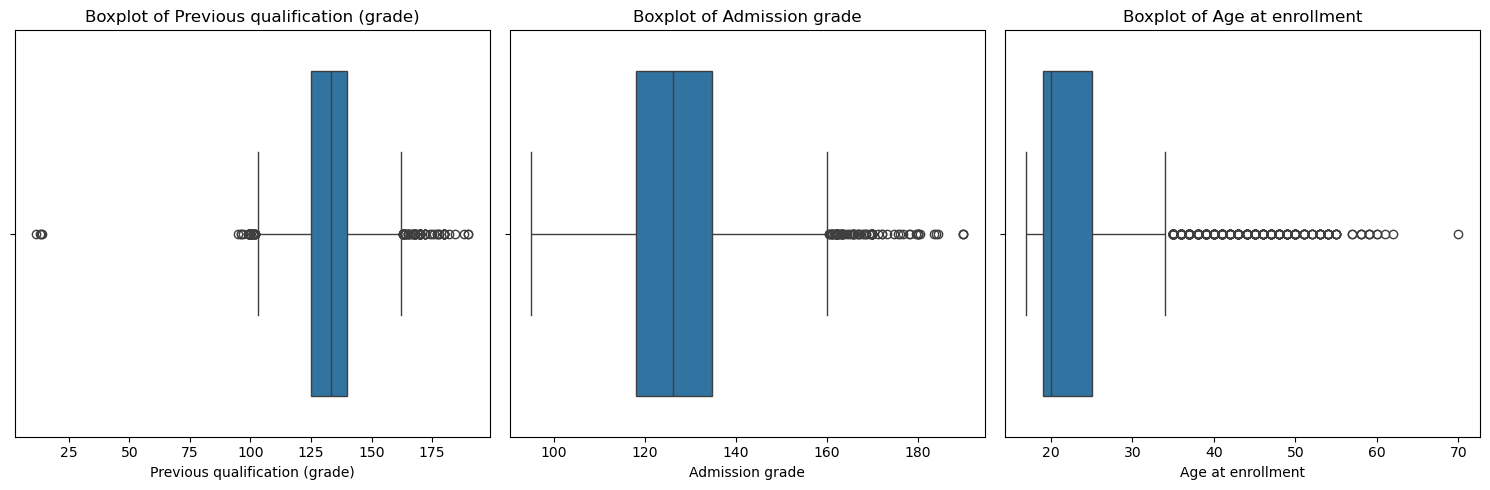

In [40]:
#Excluding binary data and category data, we only consider continuous data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, col in enumerate(df.loc[:,['Previous qualification (grade)','Admission grade','Age at enrollment']]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

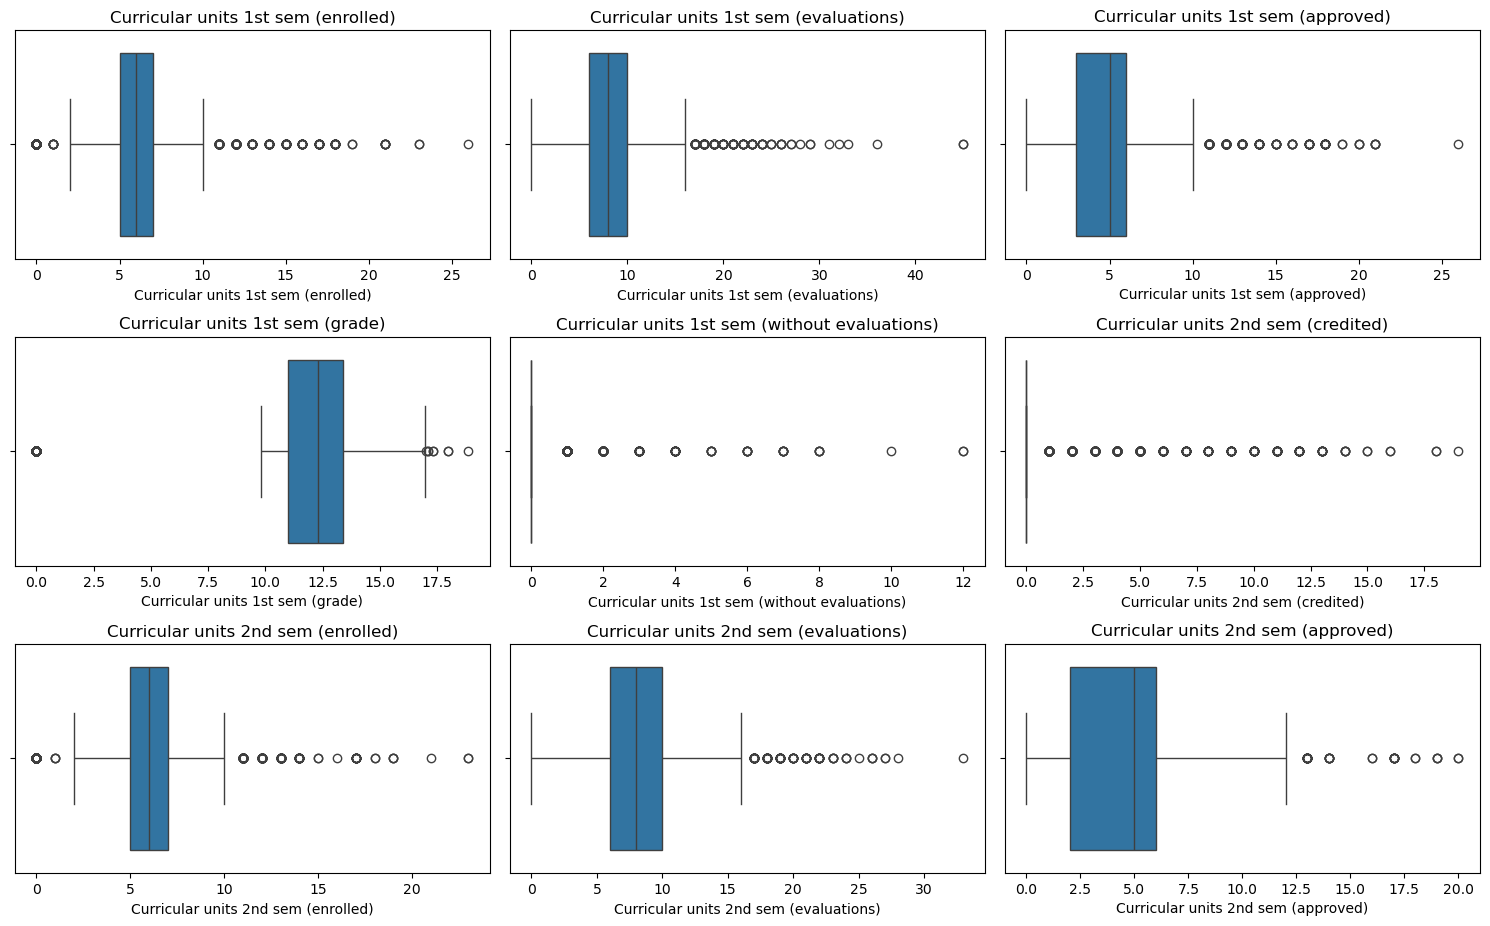

In [41]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.iloc[:,23:32]):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [18]:
from sklearn.impute import KNNImputer
#missing：use KNN Imputation
columns_to_check = ["Inflation rate", "GDP", "Unemployment rate", "Previous qualification (grade)"]
imputer = KNNImputer(n_neighbors=5)  #For each missing value, the 5 nearest (most similar) rows are found
df[columns_to_check] = imputer.fit_transform(df[columns_to_check])

print(" Missing Values After Imputation:")
print(df[columns_to_check].isnull().sum())

 Missing Values After Imputation:
Inflation rate                    0
GDP                               0
Unemployment rate                 0
Previous qualification (grade)    0
dtype: int64


In [19]:
#test DO NOT COPY IN OUR FINAL REPORT!!!!!!!!!!!!!!!!!!!!!!!!!! DON'T BE SO DAMN BLIND!!!!!!!!!!!!
df.loc[125,'Inflation rate']  #0.3(real value)

-0.3

In [20]:
df[columns_to_check]

,Inflation rate,GDP,Unemployment rate,Previous qualification (grade)
0,1.4,1.74,10.8,122.0
1,-0.3,0.79,13.9,160.0
2,1.4,1.74,10.8,122.0
3,-0.8,-3.12,9.4,122.0
4,-0.3,0.79,13.9,100.0
...,...,...,...,...
4419,2.8,-4.06,15.5,125.0
4420,0.6,2.02,11.1,120.0
4421,-0.3,0.79,13.9,154.0
4422,-0.8,-3.12,9.4,180.0


In [21]:
df.head()

,Unnamed: 0.1,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,15,1,9254,1,1,160.0,1,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,1,1,5,9070,1,1,122.0,1,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,1,17,2,9773,1,1,122.0,1,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,2,39,1,8014,0,1,100.0,1,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
